<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>Introduction to Deep Learning with Keras</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(Learning Curves, Activation Functions, Batch Normalization, and Tuning)</span></div>

## Table of Contents

1. [Learning Curves](#section-1)
2. [Activation Functions](#section-2)
3. [Batch Size and Batch Normalization](#section-3)
4. [Hyperparameter Tuning](#section-4)
5. [Conclusion](#section-5)

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. Learning Curves</span><br>

### Understanding Model Performance
Deep learning models are evaluated by monitoring their performance over time (epochs). Two primary metrics are tracked:
1.  **Loss Curve**: Represents the error of the model. Ideally, this **decreases** as epochs go by.
2.  **Accuracy Curve**: Represents how often the model is correct. Ideally, this **increases** as epochs go by.

### Diagnosing Model Behavior
Visualizing these curves helps diagnose issues:
*   **Overfitting**: This occurs when the model learns the training data too well but fails to generalize to new data.
    *   *Visual Indicator*: The Training Loss continues to decrease, but the Test (Validation) Loss starts to diverge (increase or plateau).
*   **Unstable Training**:
    *   *Visual Indicator*: The accuracy or loss curve spikes erratically rather than smoothing out. This often happens when the model starts training or if the learning rate is too high.

### The Impact of Data Size
Neural networks thrive on data. They generally require a **BIG** and **VARIED** amount of data to generalize well.
*   **Small Data**: The model might memorize the data (overfit).
*   **More Data**: The gap between Training Accuracy and Test Accuracy typically narrows, indicating better generalization.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> If your learning curve shows the model reaching a limit (plateau) early, adding more data might allow the curve to continue increasing/decreasing towards better performance. </div>

### Implementation: Analyzing Training Set Sizes
The following code demonstrates how to loop through different fractions of the training data to observe how data size impacts model performance.


e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training loop...
Done with size: 0.1
Done with size: 0.3
Done with size: 0.5
Done with size: 0.7
Done with size: 0.9


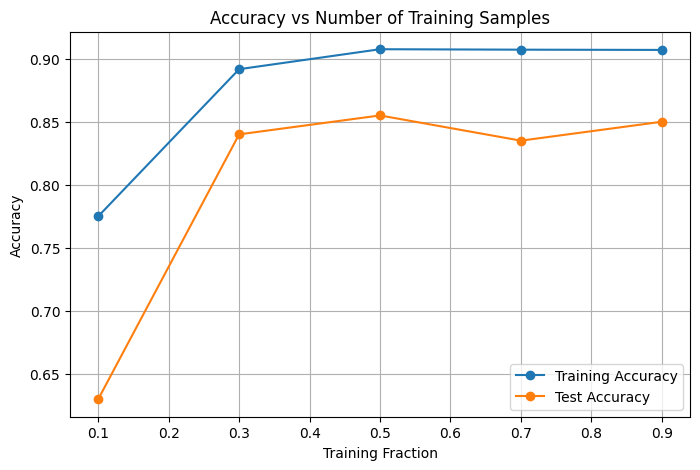

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 1. Generate Dummy Data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build a simple model
model = Sequential()
model.add(Dense(16, input_shape=(20,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Store initial weights to reset model in loop
initial_weights = model.get_weights()

# 4. Define training sizes to test (fractions)
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

train_accs = []
test_accs = []

print("Starting training loop...")

for train_size in train_sizes:
    # Split a fraction of the training data
    # Note: train_test_split with train_size returns: X_train, X_test, y_train, y_test
    # We only care about the "train" portion here which acts as our fraction
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    
    # Reset model weights
    model.set_weights(initial_weights)
    
    # Fit model
    model.fit(X_train_frac, y_train_frac, epochs=50, verbose=0,
              callbacks=[EarlyStopping(monitor='loss', patience=1)])
    
    # Evaluate on the specific training fraction
    train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)
    
    # Evaluate on the FULL test set
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accs.append(test_acc)
    
    print(f"Done with size: {train_size}")

# 5. Plotting (Optional visualization)
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_accs, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_accs, label='Test Accuracy', marker='o')
plt.xlabel('Training Fraction')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Training Samples')
plt.legend()
plt.grid(True)
plt.show()


---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. Activation Functions</span><br>

### The Role of Activation Functions
A neuron calculates a weighted sum of its inputs plus a bias:
$$ a = \sum (inputs \times weights) + bias $$
This sum ($a$) is then passed through an **Activation Function** ($f(a)$) to produce the output ($y$).
$$ y = f(a) $$

### Common Activation Functions
Different functions have different properties and use cases:

| Function | Range | Description |
| :--- | :--- | :--- |
| **Sigmoid** | 0 to 1 | Smooth S-curve. Historically used, but not recommended for deep models due to vanishing gradients. |
| **Tanh** | -1 to 1 | Hyperbolic Tangent. Zero-centered, often performs better than Sigmoid. |
| **ReLU** | 0 to $\infty$ | Rectified Linear Unit. $f(x) = max(0, x)$. The standard "go-to" for hidden layers. |
| **Leaky ReLU** | $-\infty$ to $\infty$ | Similar to ReLU but allows a small negative slope for values < 0. |

### Choosing an Activation Function
*   **No magic formula**: Choice depends on the problem.
*   **ReLU**: A good first choice for hidden layers.
*   **Sigmoid**: Generally avoided for deep hidden layers; used for binary classification output layers.
*   **Experimentation**: The best approach is often to tune this as a hyperparameter.

### Implementation: Comparing Activation Functions
We can programmatically loop through different activation functions to see which one minimizes loss the fastest.


Training with different activations...
Finished relu
Finished sigmoid
Finished tanh


<Figure size 640x480 with 0 Axes>

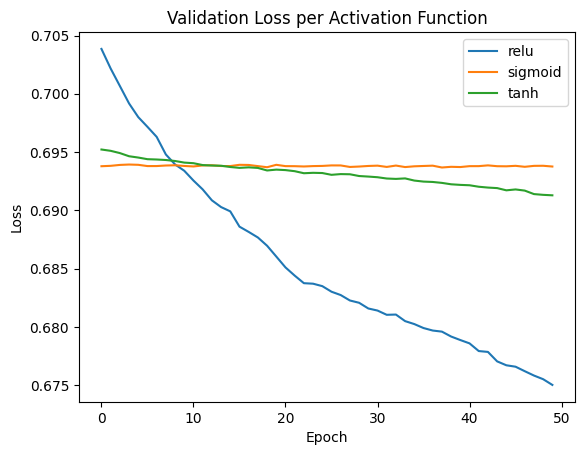

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# 1. Generate Data (Circles for non-linearity)
X, y = make_circles(n_samples=1000, noise=0.05, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 2. Define Model Builder
def get_model(act_function):
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation=act_function))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Loop through activations
activations = ['relu', 'sigmoid', 'tanh']
activation_results = {}

print("Training with different activations...")
for funct in activations:
    model = get_model(act_function=funct)
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50, verbose=0) # Reduced epochs for speed
    activation_results[funct] = history
    print(f"Finished {funct}")

# 4. Process and Plot Results
val_loss_per_funct = {k:v.history['val_loss'] for k,v in activation_results.items()}
val_loss_curves = pd.DataFrame(val_loss_per_funct)

plt.figure()
val_loss_curves.plot(title='Validation Loss per Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. Batch Size and Batch Normalization</span><br>

### Batch vs. Mini-batch
*   **Batch**: The entire dataset is passed through the network.
*   **Mini-batch**: A subset of the dataset (e.g., 32, 64, 128 images) is passed through.
    *   **1 Epoch** = All training samples passed once.
    *   If you have 1000 samples and a batch size of 100, 1 Epoch = 10 weight updates.

### Pros and Cons of Mini-batches
| Advantages | Disadvantages |
| :--- | :--- |
| Networks train faster (more updates per epoch). | More iterations need to be run. |
| Less RAM required (can train on huge datasets). | Need to find a good batch size (hyperparameter). |
| Noise can help escape local minima. | |

### Standardization
Standardization is a normalization approach often applied to inputs:
$$ \text{Standardized Value} = \frac{\text{data} - \text{mean}}{\text{standard deviation}} $$
This centers the data at 0.

### Batch Normalization
Batch Normalization applies normalization **between layers** of the neural network. It ensures that the inputs to the *next* layer are normalized, regardless of how the weights of the previous layer change.

**Advantages:**
1.  Improves gradient flow.
2.  Allows for higher learning rates.
3.  Reduces dependence on weight initialization.
4.  Acts as a form of regularization.
5.  Limits internal covariate shift.

### Implementation in Keras

#### Setting Batch Size


In [ ]:
# Fitting an already built and compiled model
# The batch_size argument controls the mini-batch size
model.fit(X_train, y_train, epochs=100, batch_size=128)


#### Adding Batch Normalization Layers
Batch Normalization is added as a layer, typically after the linear computation of a Dense layer.



In [3]:
from tensorflow.keras.layers import BatchNormalization

# Instantiate a Sequential model
model = Sequential()

# Add an input layer
model.add(Dense(3, input_shape=(2,), activation='relu'))

# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. Hyperparameter Tuning</span><br>

### Neural Network Hyperparameters
There are many parameters to tune to optimize a network:
*   Number of layers
*   Number of neurons per layer
*   Layer order
*   Activation functions
*   Batch sizes
*   Learning rates
*   Optimizers

### Tuning Strategy
*   **Grid Search**: Tries every combination (computationally expensive).
*   **Random Search**: Tries random combinations. **Preferred** for neural networks as it explores the space more efficiently.
*   **Tips**:
    *   Don't use too many epochs during tuning.
    *   Use a smaller sample of the dataset for speed.

### Implementation: RandomizedSearchCV with Keras
To use Scikit-Learn's tuning tools with Keras, we wrap the Keras model using `KerasClassifier` (or `KerasRegressor`).

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> The code below uses `tensorflow.keras.wrappers.scikit_learn`. In newer versions of Keras/TensorFlow, this wrapper is deprecated in favor of the `scikeras` library. However, the logic remains the same. </div>

#### 1. Define the Model Creator Function


In [4]:
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(16, input_shape=(20,), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



#### 2. Wrap and Tune


In [5]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a model as a sklearn estimator
model = KerasClassifier(build_fn=create_model, epochs=6, batch_size=16, verbose=0)

# Define a series of parameters
params = dict(
    optimizer=['sgd', 'adam'],
    epochs=[3],
    batch_size=[5, 10, 20],
    activation=['relu', 'tanh']
)

# Create a random search cv object
random_search = RandomizedSearchCV(model, param_distributions=params, cv=3)

# Fit to data (assuming X and y are defined)
# random_search_results = random_search.fit(X, y)

# Print results
# print("Best: %f using %s".format(random_search_results.best_score_, random_search_results.best_params_))


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'


#### 3. Tuning Network Architecture (Layers/Neurons)
We can also tune the structure of the network by passing arguments to the creation function.



In [6]:
def create_model_struct(nl=1, nn=256):
    model = Sequential()
    model.add(Dense(16, input_shape=(20,), activation='relu'))
    
    # Add as many hidden layers as specified in nl
    for i in range(nl):
        # Layers have nn neurons
        model.add(Dense(nn, activation='relu'))
        
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define parameters matching the function arguments
params_struct = dict(nl=[1, 2, 3], nn=[64, 128, 256])

# The rest of the RandomizedSearchCV process is identical



#### Enhanced Executable Code (Full Tuning Example)
*Note: This code requires `tensorflow` and `scikit-learn`. If `KerasClassifier` is unavailable in your specific environment, consider installing `scikeras`.*



In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Try importing KerasClassifier, handle deprecation warning if necessary
try:
    from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
except ImportError:
    # Fallback or note for user
    print("KerasClassifier not found in tf.keras.wrappers. Ensure you have a compatible version or use scikeras.")
    KerasClassifier = None

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# 1. Dummy Data
X, y = make_classification(n_samples=500, n_features=20, random_state=42)

# 2. Define Model Function
def create_model(nl=1, nn=64):
    model = Sequential()
    model.add(Dense(16, input_shape=(20,), activation='relu'))
    for i in range(nl):
        model.add(Dense(nn, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Run Search (Only if KerasClassifier is available)
if KerasClassifier:
    model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0)
    
    # Define parameters
    params = dict(nl=[1, 2], nn=[32, 64])
    
    # Setup Search
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=3)
    
    print("Running Randomized Search (this may take a moment)...")
    random_search_results = random_search.fit(X, y)
    
    print(f"Best Score: {random_search_results.best_score_}")
    print(f"Best Params: {random_search_results.best_params_}")
else:
    print("Skipping execution due to missing wrapper.")


KerasClassifier not found in tf.keras.wrappers. Ensure you have a compatible version or use scikeras.
Skipping execution due to missing wrapper.



---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 5. Conclusion</span><br>

### Summary
In this notebook, we covered essential techniques for improving and analyzing Deep Learning models using Keras:

1.  **Learning Curves**: We learned to interpret Loss and Accuracy curves to detect overfitting and assess if our model needs more data or regularization.
2.  **Activation Functions**: We explored how functions like ReLU, Sigmoid, and Tanh affect learning, noting that ReLU is a strong default for hidden layers.
3.  **Batch Normalization**: We implemented Batch Normalization to stabilize training, allow higher learning rates, and improve gradient flow.
4.  **Hyperparameter Tuning**: We utilized `RandomizedSearchCV` to automate the process of finding the best combination of layers, neurons, and other hyperparameters.

### Next Steps
*   **Experiment**: Try applying Batch Normalization to a deeper network and observe the convergence speed compared to a network without it.
*   **Advanced Tuning**: Look into `KerasTuner`, a dedicated library for hyperparameter tuning that offers more advanced strategies (like Hyperband) than standard Random Search.
*   **Real Data**: Apply these concepts to a real-world dataset like the MNIST digit classifier or the Titanic survival prediction.
